In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [7]:
df_expo = pd.read_excel(r'./data/soya_regresor.xlsx')
df_expo.head()

,YEAR,MONTH,PIB_MES_1,COMM_ACEITE_MES_1,KILBRU_ACEITE_MES_1,VALOR_FOB_ACEITE_MES_1,PIB_MES_12,COMM_ACEITE_MES_12,KILBRU_ACEITE_MES_12,VALOR_FOB_ACEITE_MES_12,VALOR_FOB_ACEITE,KILBRU_TORTA_MES_1,COMM_HARINA_MES_1,VALOR_FOB_TORTA_MES_1,KILBRU_TORTA_MES_12,COMM_HARINA_MES_12,VALOR_FOB_TORTA_MES_12,VALOR_FOB_TORTA
0,1992,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304451.0,NaN,NaN,NaN,NaN,NaN,NaN,1089250.0
1,1992,2,307.670824,420.421,365720.0,304451.0,NaN,NaN,NaN,NaN,430771.0,4657464.0,175.8,1089250.0,NaN,NaN,NaN,3240782.0
2,1992,3,306.133843,424.389,509268.0,430771.0,NaN,NaN,NaN,NaN,646738.0,14997048.0,174.1,3240782.0,NaN,NaN,NaN,1795147.0
3,1992,4,304.517081,446.436,771850.0,646738.0,NaN,NaN,NaN,NaN,595243.0,6022430.0,178.7,1795147.0,NaN,NaN,NaN,2976684.0
4,1992,5,347.020861,430.121,690990.0,595243.0,NaN,NaN,NaN,NaN,169422.0,11647644.0,172.9,2976684.0,NaN,NaN,NaN,940598.0


In [8]:
df_expo = df_expo.dropna()
df_expo.shape

(351, 18)

In [5]:
df_expo = df_expo.rename(columns={"GESTION": "YEAR", "MES": "MONTH"})
df_expo['DATE'] = pd.to_datetime(df_expo[['YEAR', 'MONTH']].assign(DAY=1))
df_expo = df_expo.set_index('DATE')

In [9]:
df_expo.columns

Index(['YEAR', 'MONTH', 'PIB_MES_1', 'COMM_ACEITE_MES_1',
       'KILBRU_ACEITE_MES_1', 'VALOR_FOB_ACEITE_MES_1', 'PIB_MES_12',
       'COMM_ACEITE_MES_12', 'KILBRU_ACEITE_MES_12', 'VALOR_FOB_ACEITE_MES_12',
       'VALOR_FOB_ACEITE', 'KILBRU_TORTA_MES_1', 'COMM_HARINA_MES_1',
       'VALOR_FOB_TORTA_MES_1', 'KILBRU_TORTA_MES_12', 'COMM_HARINA_MES_12',
       'VALOR_FOB_TORTA_MES_12', 'VALOR_FOB_TORTA'],
      dtype='object')

In [10]:
oil_features = ['MONTH', 'PIB_MES_1', 'COMM_ACEITE_MES_1',
       'KILBRU_ACEITE_MES_1', 'VALOR_FOB_ACEITE_MES_1', 'PIB_MES_12', 'COMM_ACEITE_MES_12',
       'KILBRU_ACEITE_MES_12', 'VALOR_FOB_ACEITE_MES_12']
oil_label = 'VALOR_FOB_ACEITE'

In [11]:
df_aceite_test = df_expo['VALOR_FOB_ACEITE'].to_frame()[280:]

In [12]:
train_df = df_expo[:280]
test_df = df_expo[280:]
X_train, y_train = train_df[oil_features], train_df[oil_label]
X_test, y_test = test_df[oil_features], test_df[oil_label]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 9), (280,), (71, 9), (71,))

In [14]:
reg_1 = XGBRegressor(n_estimators=700, learning_rate=0.05)
reg_1.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mae:10635554.27812	validation_1-mae:26370848.82218
[1]	validation_0-mae:10135708.14330	validation_1-mae:25455120.49824
[2]	validation_0-mae:9657824.14102	validation_1-mae:24427300.39437
[3]	validation_0-mae:9212377.71060	validation_1-mae:23526739.54225
[4]	validation_0-mae:8785936.06652	validation_1-mae:22636857.05282
[5]	validation_0-mae:8374145.24710	validation_1-mae:21988795.41461
[6]	validation_0-mae:7988477.06172	validation_1-mae:21172848.04489
[7]	validation_0-mae:7618183.14548	validation_1-mae:20587248.62148
[8]	validation_0-mae:7265579.78610	validation_1-mae:19874501.70599
[9]	validation_0-mae:6928464.03984	validation_1-mae:19195405.63556
[10]	validation_0-mae:6609620.02411	validation_1-mae:18783703.97711
[11]	validation_0-mae:6307376.26283	validation_1-mae:18190821.89261
[12]	validation_0-mae:6020958.15698	validation_1-mae:17589931.13028
[13]	validation_0-mae:5747806.49855	validation_1-mae:17047377.22535
[14]	validation_0-mae:5482778.63521	validation_1-mae:164

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=700, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [15]:
predictions = reg_1.predict(X_test)
df_aceite_test['xgboost'] = reg_1.predict(X_test)

In [16]:
plt.style.use('fivethirtyeight')

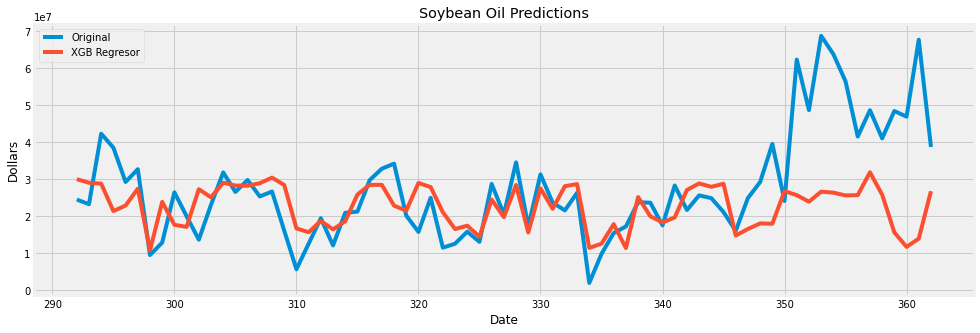

In [19]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.plot(df_aceite_test.index, df_aceite_test['VALOR_FOB_ACEITE'], label='Original')
axes.plot(df_aceite_test.index, df_aceite_test['xgboost'], label='XGB Regresor')
axes.legend()
axes.set_xlabel('Date')
axes.set_ylabel('Dollars')
plt.title('Soybean Oil Predictions')
plt.show()

### egunda parte

In [20]:
meal_features = ['MONTH', 'PIB_MES_1', 'COMM_HARINA_MES_1',
       'KILBRU_TORTA_MES_1', 'VALOR_FOB_TORTA_MES_1', 'PIB_MES_12', 'COMM_HARINA_MES_12',
       'KILBRU_TORTA_MES_12', 'VALOR_FOB_TORTA_MES_12']
meal_label = 'VALOR_FOB_TORTA'

In [21]:
df_harina_test = df_expo['VALOR_FOB_TORTA'].to_frame()[280:]

In [22]:
#train_df = df_expo[:280]
#test_df = df_expo[280:]
X_train, y_train = train_df[meal_features], train_df[meal_label]
X_test, y_test = test_df[meal_features], test_df[meal_label]

In [23]:
reg_2 = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg_2.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:21802311.21964	validation_1-mae:46749343.28169
[1]	validation_0-mae:21593146.26027	validation_1-mae:46302002.32394
[2]	validation_0-mae:21386361.55179	validation_1-mae:45858948.00000
[3]	validation_0-mae:21181631.50290	validation_1-mae:45420139.97183
[4]	validation_0-mae:20979020.84420	validation_1-mae:44982327.70423
[5]	validation_0-mae:20777672.22589	validation_1-mae:44551866.02113
[6]	validation_0-mae:20578838.82232	validation_1-mae:44122370.42958
[7]	validation_0-mae:20383542.68906	validation_1-mae:43689550.81690
[8]	validation_0-mae:20188776.57344	validation_1-mae:43243619.82394
[9]	validation_0-mae:19996113.10714	validation_1-mae:42801967.69014
[10]	validation_0-mae:19805056.56629	validation_1-mae:42364554.09859
[11]	validation_0-mae:19616118.76920	validation_1-mae:41931338.17606
[12]	validation_0-mae:19428431.52879	validation_1-mae:41528667.96479
[13]	validation_0-mae:19242963.32366	validation_1-mae:41102436.53521
[14]	validation_0-mae:19059218.37701	validat

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-mae:13177399.40279	validation_1-mae:29267427.59155
[54]	validation_0-mae:13054199.86362	validation_1-mae:29022678.23944
[55]	validation_0-mae:12932934.56317	validation_1-mae:28818024.83099
[56]	validation_0-mae:12812512.59062	validation_1-mae:28624631.60563
[57]	validation_0-mae:12693987.61172	validation_1-mae:28453425.83099
[58]	validation_0-mae:12575728.77634	validation_1-mae:28210367.97183
[59]	validation_0-mae:12458244.54520	validation_1-mae:28008534.22535
[60]	validation_0-mae:12343044.60960	validation_1-mae:27817838.76056
[61]	validation_0-mae:12229130.29911	validation_1-mae:27652999.04225
[62]	validation_0-mae:12115212.52612	validation_1-mae:27418805.04225
[63]	validation_0-mae:12002166.90837	validation_1-mae:27191990.84507
[64]	validation_0-mae:11892535.27299	validation_1-mae:26980176.90141
[65]	validation_0-mae:11783582.99308	validation_1-mae:26760032.50704
[66]	validation_0-mae:11675647.31027	validation_1-mae:26541922.84507
[67]	validation_0-mae:11568099.622

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [24]:
predictions = reg_2.predict(X_test)
df_harina_test['xgboost'] = reg_2.predict(X_test)

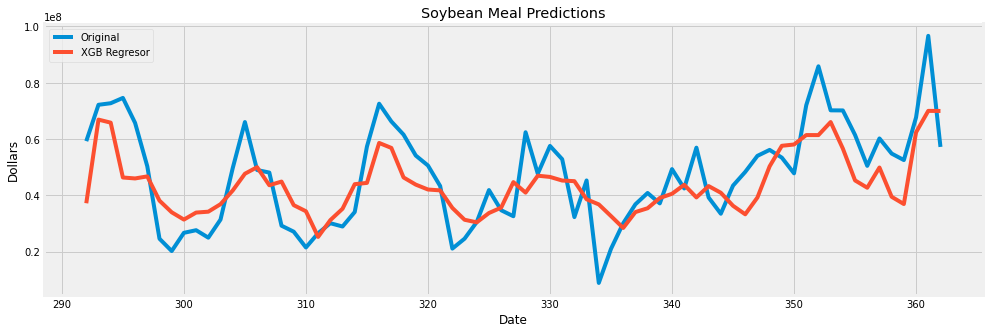

In [25]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.plot(df_harina_test.index, df_harina_test['VALOR_FOB_TORTA'], label='Original')
axes.plot(df_harina_test.index, df_harina_test['xgboost'], label='XGB Regresor')
axes.legend()
axes.set_xlabel('Date')
axes.set_ylabel('Dollars')
plt.title('Soybean Meal Predictions')
plt.show()